<a href="https://colab.research.google.com/github/Himanshu-sharmaonline/Hands-On-work/blob/main/Kaggle/X_ray_abnormalities_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#kaggle competitions download -c vinbigdata-chest-xray-abnormalities-detection
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"himanshukumarsharma","key":"fa5ee604878d59cd89053ba9b5d7643e"}'}

In [3]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/

In [5]:
! kaggle competitions download -c vinbigdata-chest-xray-abnormalities-detection

 65% 5.00M/7.65M [00:00<00:00, 43.8MB/s]
100% 7.65M/7.65M [00:00<00:00, 48.8MB/s]
100% 4.74M/4.74M [00:00<00:00, 41.4MB/s]

 52% 5.00M/9.58M [00:00<00:00, 30.2MB/s]
100% 9.58M/9.58M [00:00<00:00, 46.9MB/s]
100% 4.19M/4.19M [00:00<00:00, 28.6MB/s]

100% 8.79M/8.79M [00:00<00:00, 31.3MB/s]

 77% 5.00M/6.48M [00:00<00:00, 35.8MB/s]
100% 6.48M/6.48M [00:00<00:00, 41.2MB/s]
 66% 9.00M/13.7M [00:00<00:00, 23.9MB/s]
100% 13.7M/13.7M [00:00<00:00, 27.8MB/s]
 62% 5.00M/8.11M [00:00<00:00, 19.2MB/s]
100% 8.11M/8.11M [00:00<00:00, 27.0MB/s]
 55% 5.00M/9.12M [00:00<00:00, 18.1MB/s]
100% 9.12M/9.12M [00:00<00:00, 30.4MB/s]
100% 4.63M/4.63M [00:00<00:00, 45.5MB/s]

 57% 5.00M/8.71M [00:00<00:00, 11.8MB/s]
100% 8.71M/8.71M [00:00<00:00, 19.5MB/s]
 51% 5.00M/9.74M [00:00<00:00, 21.5MB/s]
100% 9.74M/9.74M [00:00<00:00, 32.4MB/s]
 79% 5.00M/6.30M [00:00<00:00, 40.8MB/s]
100% 6.30M/6.30M [00:00<00:00, 38.8MB/s]
 79% 5.00M/6.33M [00:00<00:00, 21.4MB/s]
100% 6.33M/6.33M [00:00<00:00, 25.1MB/s]
 56% 5.00M/8

In [6]:
!pip install -q pydicom

     |████████████████████████████████| 1.9MB 8.5MB/s 


In [7]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
from zipfile import ZipFile
import pydicom as dicom

In [8]:
train=pd.read_csv(r'/content/train.csv.zip')

In [9]:
train.head() #radiation den

image_id          class_name  ...   x_max   y_max
0  50a418190bc3fb1ef1633bf9678929b3          No finding  ...     NaN     NaN
1  21a10246a5ec7af151081d0cd6d65dc9          No finding  ...     NaN     NaN
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly  ...  1653.0  1831.0
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement  ...  1611.0  1019.0
4  063319de25ce7edb9b1c6b8881290140          No finding  ...     NaN     NaN

[5 rows x 8 columns]

In [10]:
for i in glob.glob("/content/*dicom.zip"):
  if i.endswith(".zip"):
    with ZipFile(i, 'r') as zipObj:
   # Extract all the contents of zip file in different directory
      zipObj.extractall('unzip')

In [11]:
unzip_files=[]
for i in glob.glob("/content/unzip/*.dicom"):
  unzip_files.append(i)

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


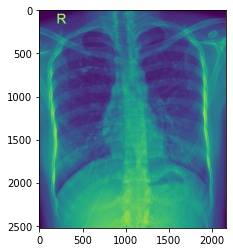

In [14]:
image_path = unzip_files[0]
ds = dicom.dcmread(image_path)
plt.imshow(ds.pixel_array)
plt.show()

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "
/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


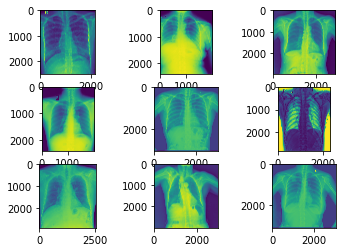

In [15]:
for i in range(9):
  ds = dicom.dcmread(unzip_files[i])
  plt.subplot(330 + 1 + i)
  plt.imshow(ds.pixel_array)
	# plt.imshow(training_features[i], cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
filter=[i.rsplit("/",1)[1][:-6] for i in unzip_files if i.rsplit("/",1)[1][:-6] in train["image_id"].tolist()]

In [18]:
ploting=train[train["image_id"]==filter[0]]

In [19]:
ploting

image_id  class_name  ...  x_max y_max
35997  005be26a68485912e007a3703f43d60a  No finding  ...    NaN   NaN
39916  005be26a68485912e007a3703f43d60a  No finding  ...    NaN   NaN
50564  005be26a68485912e007a3703f43d60a  No finding  ...    NaN   NaN

[3 rows x 8 columns]

In [20]:
def image(name):
  image_path = "/content/unzip/"+ name+".dicom"
  ploting=train[train["image_id"]==name]
  ds = dicom.dcmread(image_path)
  fig, ax = plt.subplots(figsize=(20, 10))
  ax.imshow(ds.pixel_array)
  # plt.imshow(ds.pixel_array)
  for i in ploting.index:
    x=ploting["x_min"][i]
    y=ploting["y_min"][i]
    hor=ploting["x_max"][i]-ploting["x_min"][i]
    ver=ploting["y_max"][i]-ploting["y_min"][i]
    rect = patches.Rectangle((x, y), hor,ver, linewidth=1, edgecolor='r', facecolor='none',label=ploting["class_name"][i])
    ax.add_patch(rect)
  # rect = patches.Rectangle((900.0, 587.0), 1205.0-900.0, 888.0-587.0, linewidth=1, edgecolor='r', facecolor='none',)
  # ax.add_patch(rect)
  # Add the patch to the Axes
  # plt.subplot.add_patch(rect)
  plt.legend()
  # plt.show()
  return plt.show()

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


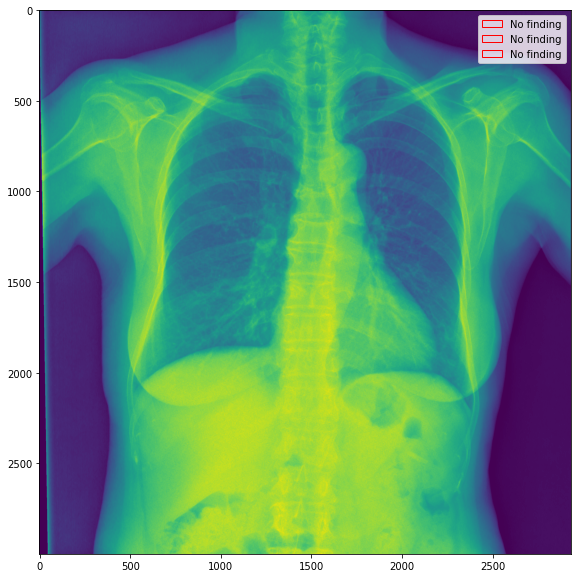

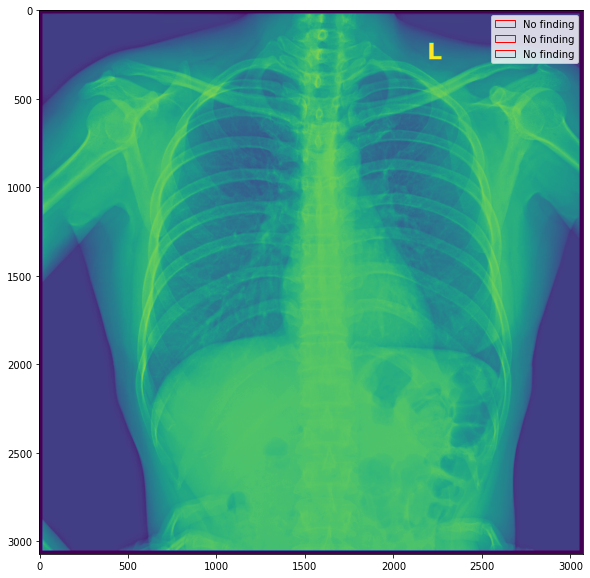

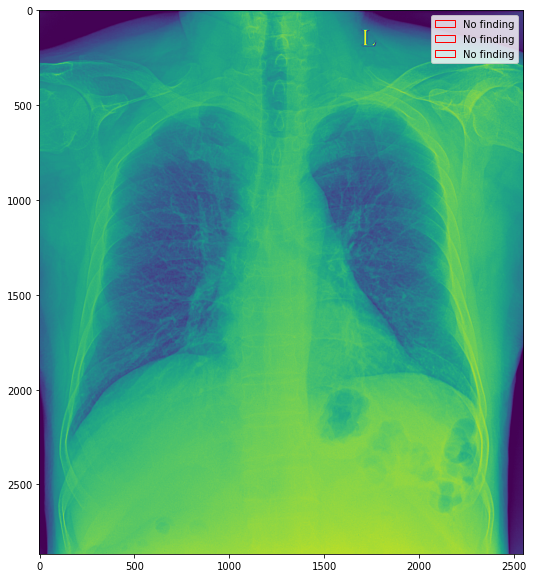

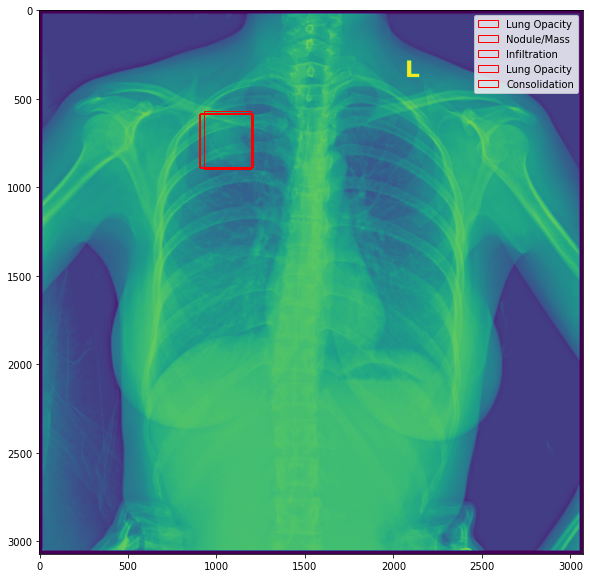

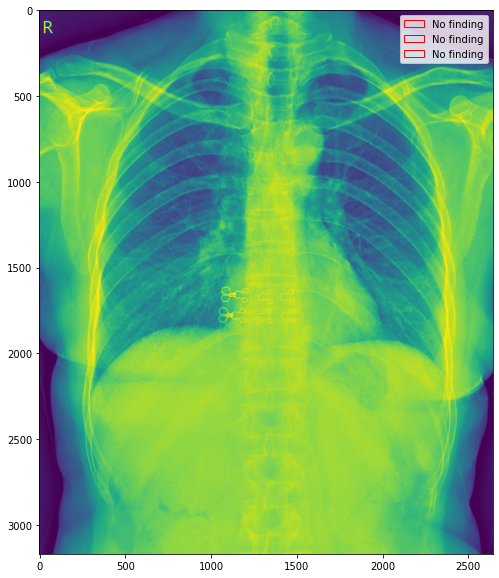

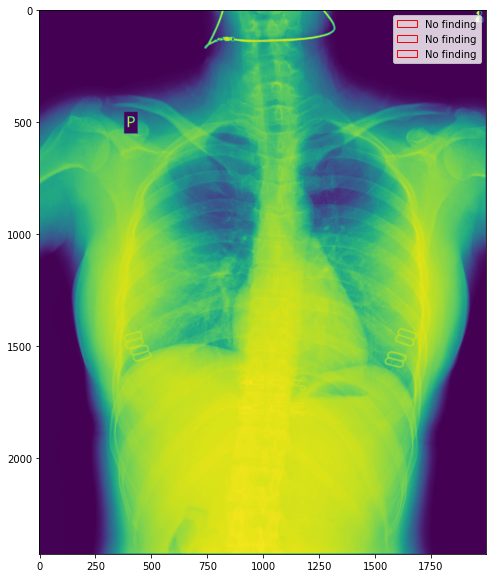

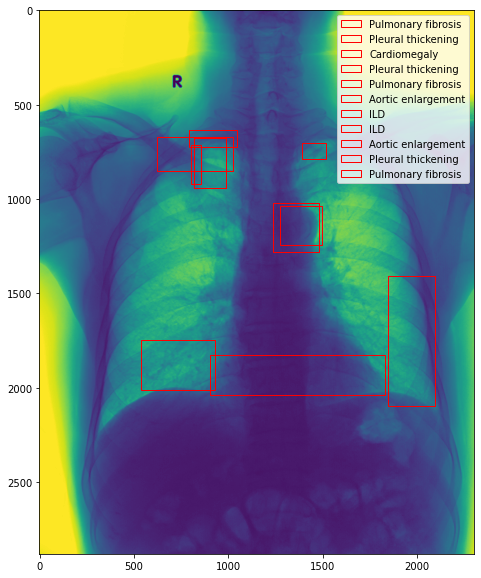

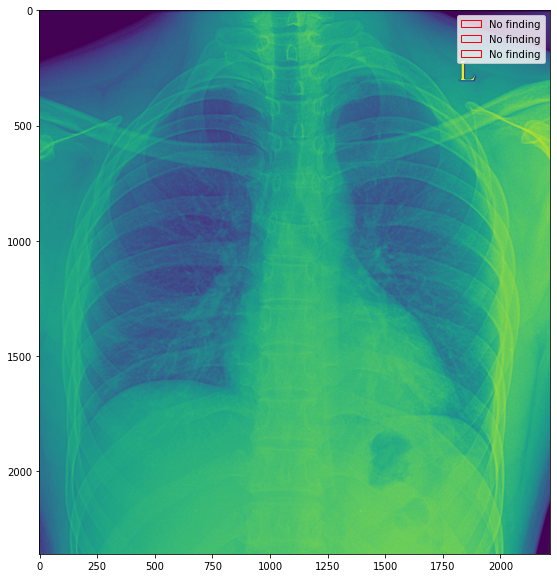

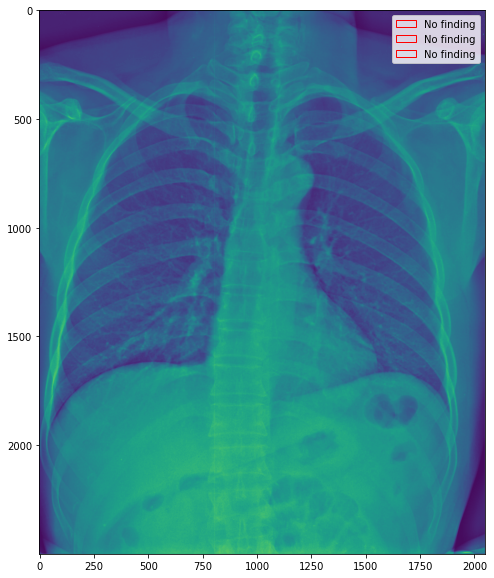

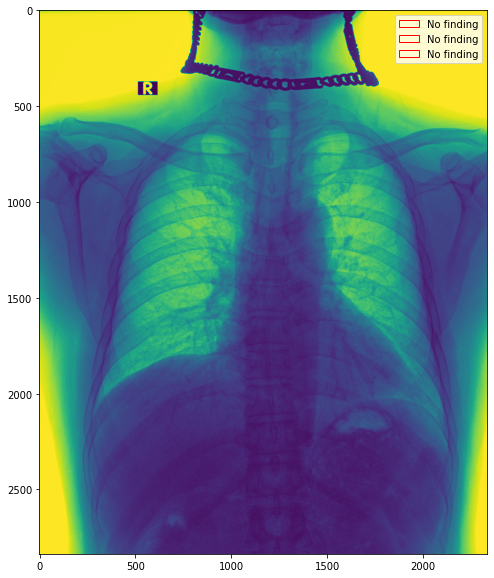

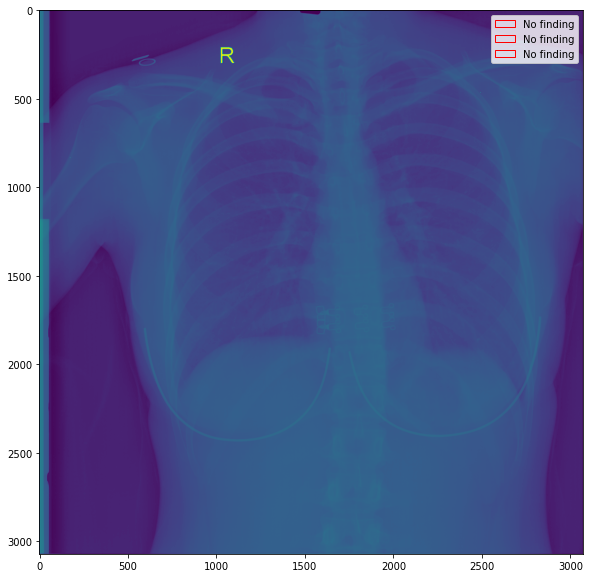

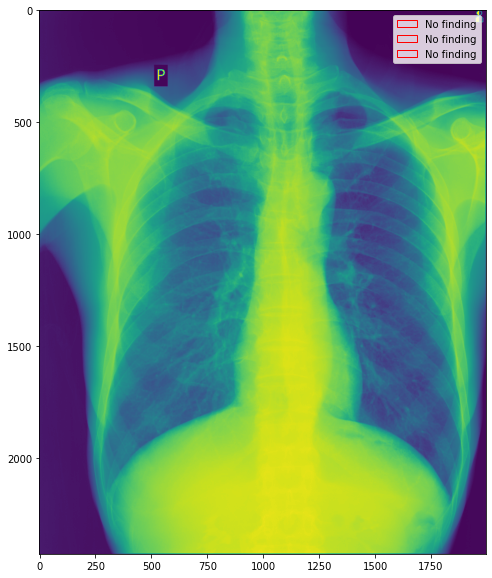

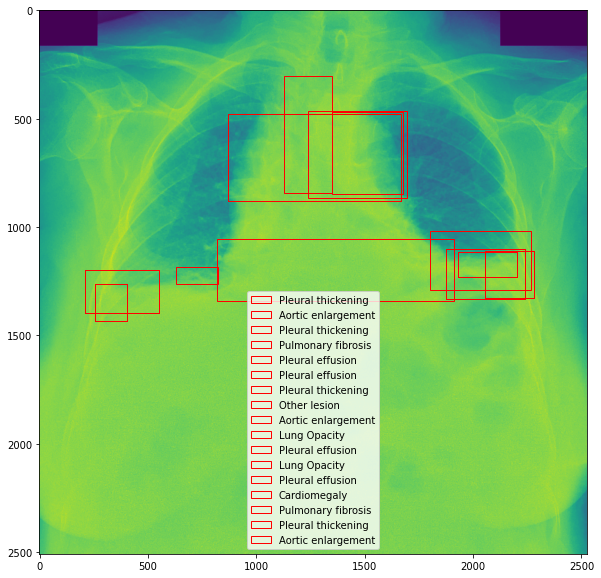

In [21]:
for i in range(13):
  # plt.imshow(ds.pixel_array)
	# plt.imshow(training_features[i], cmap=plt.get_cmap('gray'))  
  image(filter[i])

No handles with labels found to put in legend.


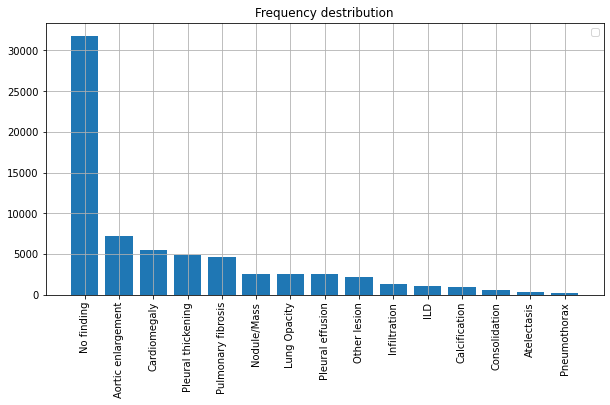

In [30]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
keys=train["class_name"].value_counts().keys()
value=train["class_name"].value_counts().values
ax.bar(keys,value)
ax.set_title("Frequency destribution")
ax.set_xticklabels(keys,rotation=90)
plt.grid()
plt.show()

In [35]:
image_id = filter[2]
data_file = dicom.dcmread('unzip/'+image_id+'.dicom')
img = data_file.pixel_array

In [36]:
print(data_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 166
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 0059d21bef1793fa9522e4ec8cae1a1a
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: 'INF_3.9'
(0002, 0016) Source Application Entity Title     AE: 'TITAN'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'M'
(0010, 1010) Patient's Age                       AS: '000Y'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0008) Number of Frames                    IS: "1"
(0028, 0010) R